# Exploratory Data Analysis of the Titanic Dataset
Beth Spornitz
September 23, 2024

This code uses a combination of Python and Markdown to create an initial data story of the sinking of the Titanic.  Class, Sex, and Age will all be explored in relation to survival.

Specific to the titanic dataset, this file will walk through how to perform these functions:
1.  Data Acquisition
2.  Initial Data Inspection
3.  Initial Descriptive Statistics
4.  Initial Data Distribution for Numerical Columns
5.  Initial Data Distribution for Categorical Columns
6.  Initial Data Preparation (or Data Preprocessing)
7.  Initial Visualizations
8.  Initial Storytelling and Presentation

These steps will be followed by visualizations and explanations of visualizations.  Using visualizations, I will attempt to answer the following questions:  
1.  Did Fare Amount play any role in survival?
2.  Did passenger class play a role in survival?
3.  Did the sex of the passengers play a role in survival?
4.  Did age play a role in survival?
5.  Overall, what is the order of the different groups and their survival if we look at class and sex?


### Import Dependencies

In [733]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np  
import logging

In [734]:
##Configure logging to write to a file, appending new logs to the existing file
logging.basicConfig(filename='log.txt', level=logging.DEBUG, filemode='a', format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Program started") # add this at the beginning of the main method
logging.info("Program ended") # add this at the end of the main method

### Data Acquisition

In [735]:
# Load the Titanic dataset into DataFrame
df = sns.load_dataset('titanic')

# Inspect first rows of the DataFrame
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Initial Data Inspection

In [736]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

### Initial Descriptive Statistics

In [737]:
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


##### Observations  
We can see right off that around 38% of the Titanic passengers survived.  We can also see that the average age was 29 years old.

### Initial Data Distribution for Numerical Columns

##### Pair Plot for Age, Fare, and Survived

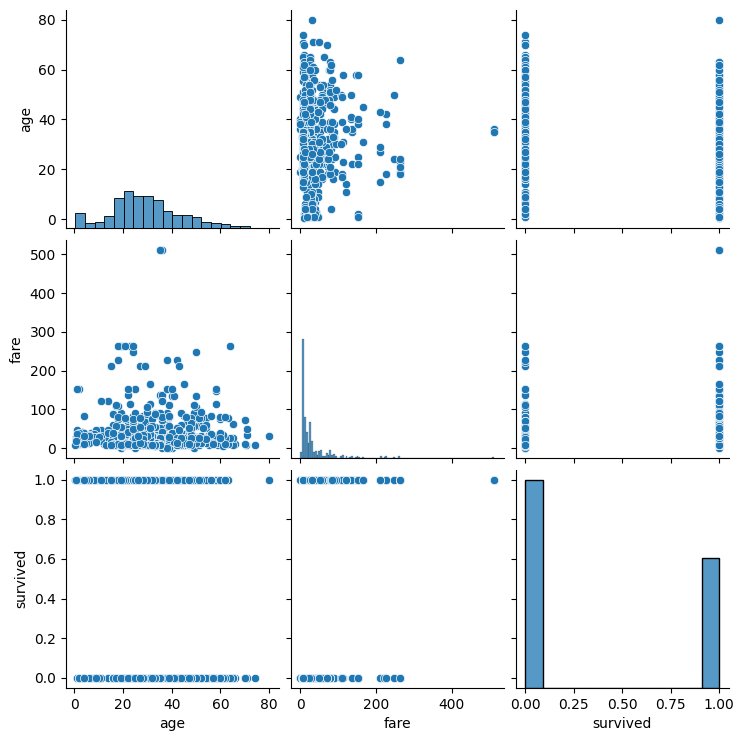

In [738]:
sns.pairplot(df[['age', 'fare', 'survived']])
plt.show()

##### Observations
The age, fare, and survived pair plot demonstrates immediately that more people died than survived the disaster.

##### Density Plots
This first density plot is based on age alone.

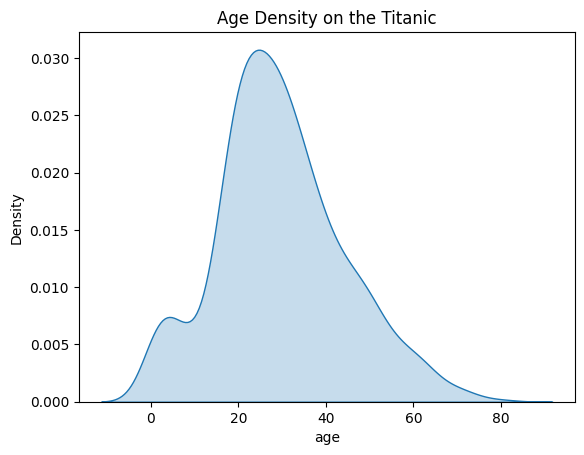

In [739]:
sns.kdeplot(df['age'], fill=True)
plt.title('Age Density on the Titanic')
plt.xlabel('age')
plt.ylabel('Density')
plt.show()

##### Observations
The age density plot is showing that most passengers were between the ages of 20 and 40.

This density plot combined age with passenger class.

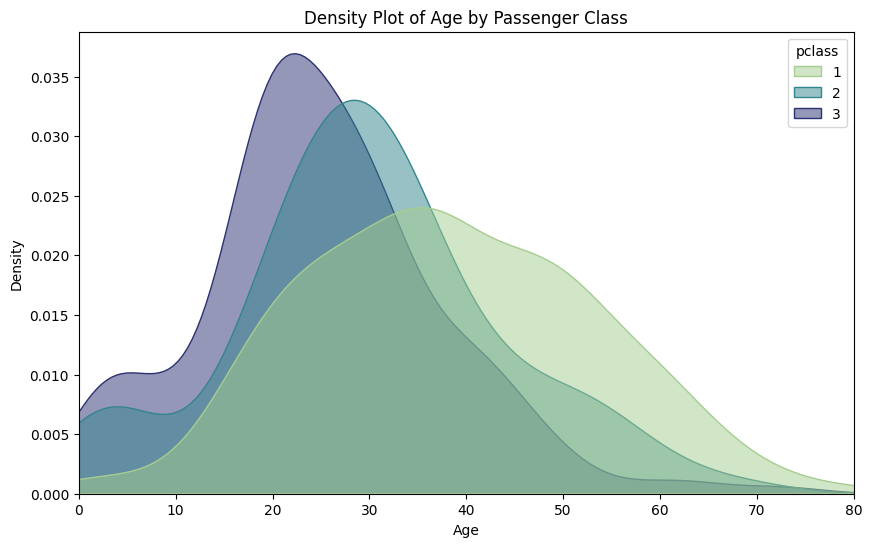

In [740]:
# Create a density plot for Age by Passenger Class
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='pclass', fill=True, common_norm=False, alpha=0.5, palette='crest')

# Customize the plot
plt.title('Density Plot of Age by Passenger Class')
plt.xlabel('Age')
plt.ylabel('Density')
plt.xlim(0, df['age'].max())  # Limit x-axis to the max age in the dataset

plt.show()

##### Observations  
The density plot of age by passenger class illistrates the following:    
-There were more 3rd class passengers than 1st or 2nd class, and there were more 2nd class passengers than there were 1st class passengers.  
-The 3rd class passengers were generally younger than those in 2nd class and 1st clss.  


#### Initial Data Distribution for Categorical Columns

Value counts for column: sex
sex
male      577
female    314
Name: count, dtype: int64



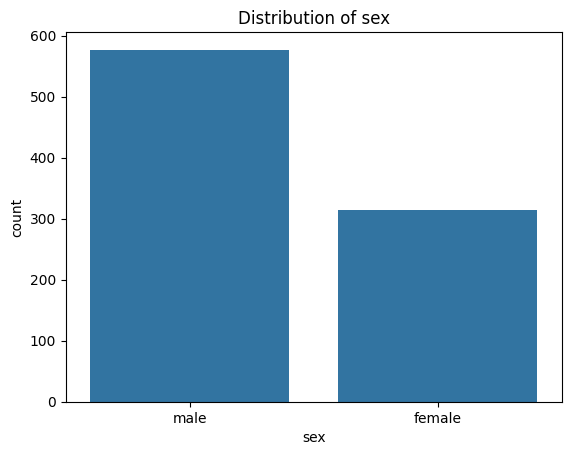

Value counts for column: embarked
embarked
S    644
C    168
Q     77
Name: count, dtype: int64



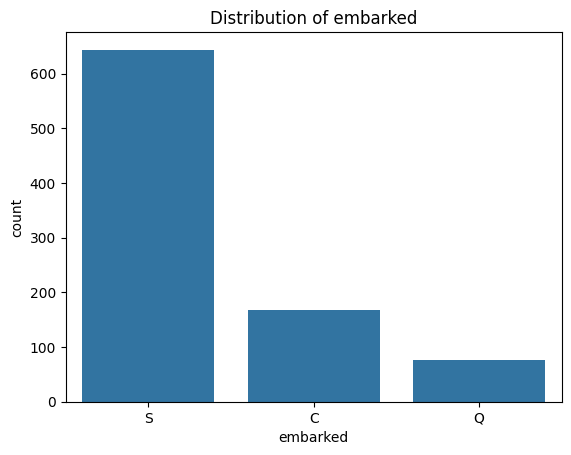

Value counts for column: class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



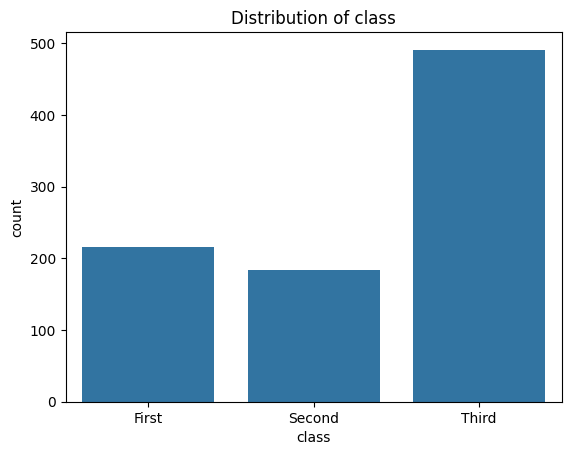

Value counts for column: who
who
man      537
woman    271
child     83
Name: count, dtype: int64



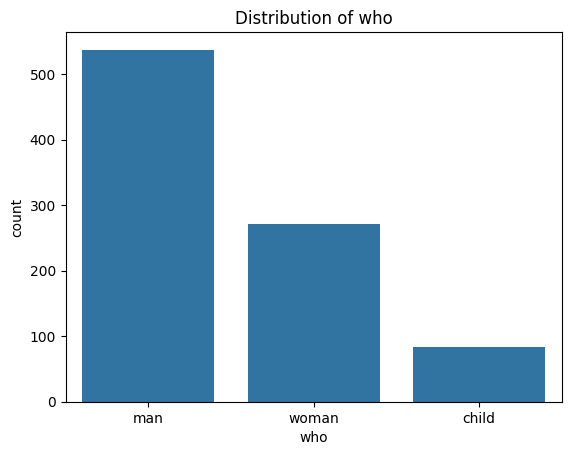

Value counts for column: deck
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64



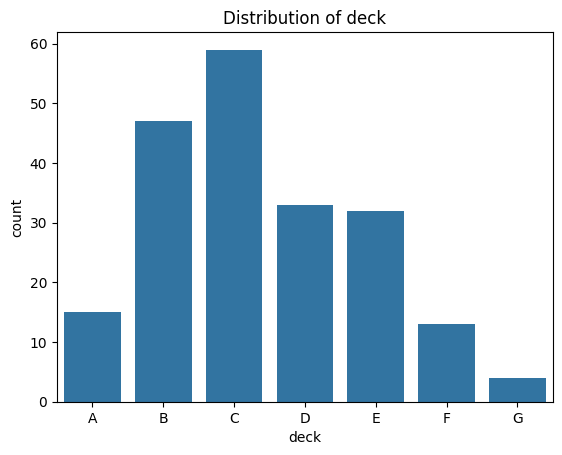

Value counts for column: embark_town
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



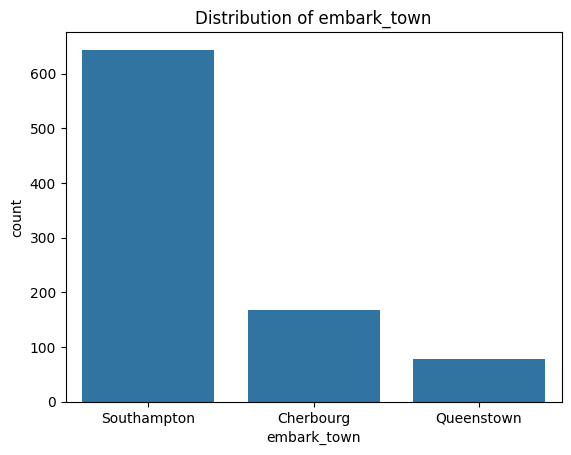

Value counts for column: alive
alive
no     549
yes    342
Name: count, dtype: int64



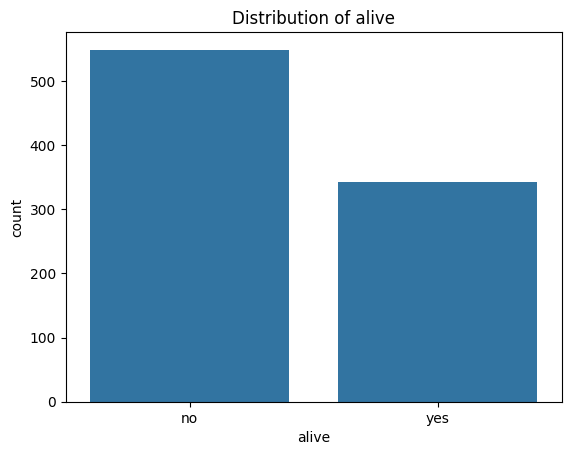

In [741]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f'Value counts for column: {col}')
    print(df[col].value_counts())
    print()
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

##### Observations    

From these initial categorical column investigations, we can tell several things:  
1.  More people died on the titanic than survived.  
2.  More passengers embarked in Southampton than Queenstown or Cherbourg. 
3.  Deck C house the most passengers.  
4.  The third class passengers make up the bulk of the passengers. 
5.  There were many more male passengers than female passengers.

#### Initial Data Transformation and Feature Engineering

In [742]:
# Define a dictionary mapping old column names to new names
new_column_names = {
    'pclass': 'Passenger Class',
    'sex': 'Sex',
    'age': 'Age',
    'sibsp': 'Siblings/Spouses Aboard',
    'parch': 'Parents/Children Aboard',
    'fare': 'Fare Amount',
    'survived': 'Survival Status'
}

# Rename the columns in the DataFrame using the dictionary
df.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame column names to verify the changes
print(df.columns)

# Adding new columns for family size and total fare
df['Family Size'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard'] + 1  # Include the passenger
df['Fare Per Person'] = df['Fare Amount'] / df['Family Size']

# Display the first few rows of the updated DataFrame to verify the changes
print(df.head())

Index(['Survival Status', 'Passenger Class', 'Sex', 'Age',
       'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare Amount',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
   Survival Status  Passenger Class     Sex   Age  Siblings/Spouses Aboard  \
0                0                3    male  22.0                        1   
1                1                1  female  38.0                        1   
2                1                3  female  26.0                        0   
3                1                1  female  35.0                        1   
4                0                3    male  35.0                        0   

   Parents/Children Aboard  Fare Amount embarked  class    who  adult_male  \
0                        0       7.2500        S  Third    man        True   
1                        0      71.2833        C  First  woman       False   
2                        0       7.9250   

### Initial Data Visualization


#### Question 1:  Did fare have any impact on survival?

##### Scatterplot of Age vs. Fare and Survival

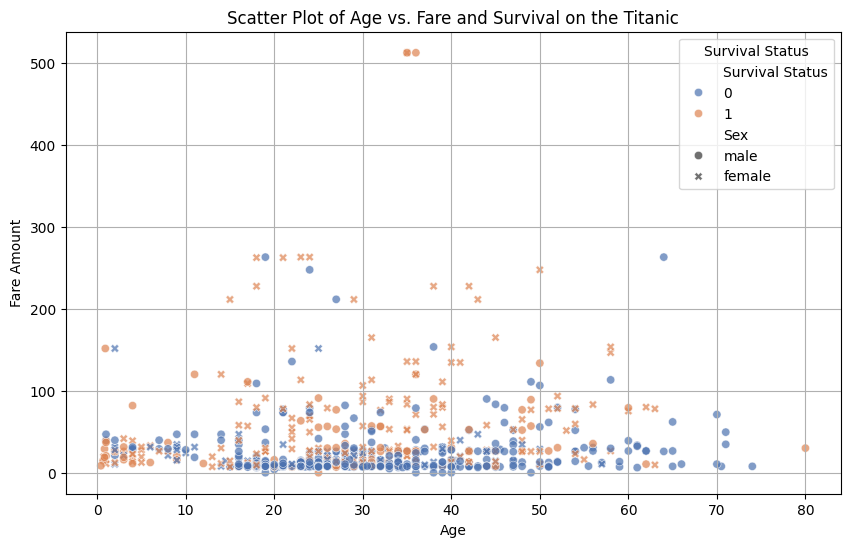

In [743]:
# Set up the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare Amount', hue='Survival Status', style='Sex', palette='deep', alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Age vs. Fare and Survival on the Titanic')
plt.xlabel('Age')
plt.ylabel('Fare Amount')
plt.legend(title='Survival Status')
plt.grid()

# Show the plot
plt.show()

##### Observataions
The scatterplot shows that more women survived than men and the two passengers paying the highest fair also survived.  There are a lot of data points in this scatter plot so it is diffuclt to draw conclusive conclusions, but it does appear that many females paying a higher fare survived.

#### Correlation Heatmap

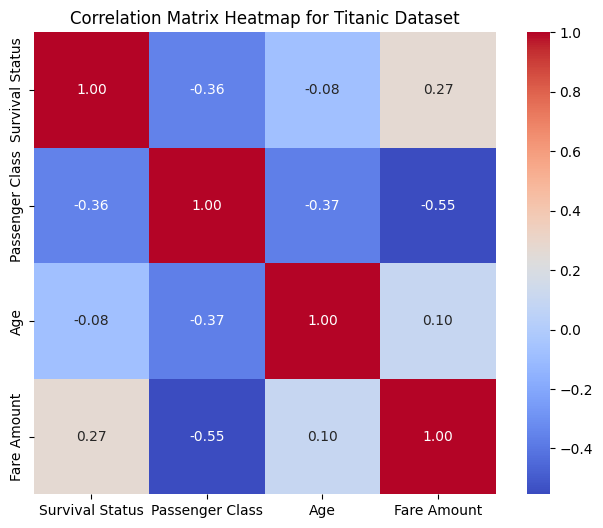

In [745]:
# Select only numeric columns relevant for correlation analysis
numeric_cols = df[['Survival Status', 'Passenger Class', 'Age', 'Fare Amount']]

# Calculate the correlation matrix
correlation = numeric_cols.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap for Titanic Dataset')
plt.show()

##### Observations  
Some possible correlations to be made from this heatmap are that the Fare Amount is correlated to Passenger class which makes perfect sense, and then there are some correlations betwen passenger class and survival.  However, there does not seem to be an extremely strong correlation directly between Fare Amount and survival.

#### Question 2:  Does Passenger Class Impact Survival?

##### Count Plot of Passengers by Passenger Class and Surival Status

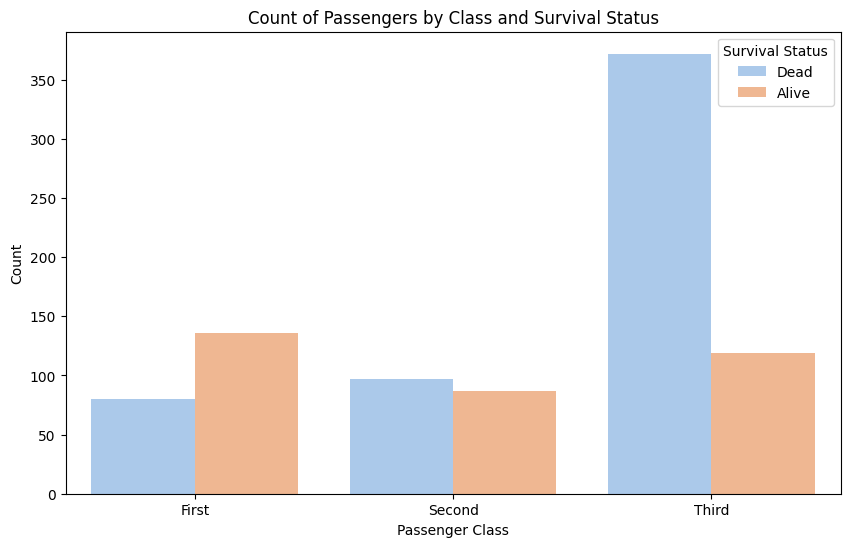

In [749]:
# Create a count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='class', hue='survived', data=df, palette='pastel')

# Customize the plot
plt.title('Count of Passengers by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Rename legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Dead', 'Alive'], title='Survival Status')

plt.show()

##### Observation  
It is very easy to see that there were many more third class passengers that died than the first or second class passengers.

##### Bar Plot for Survival Counts by Passenger Class

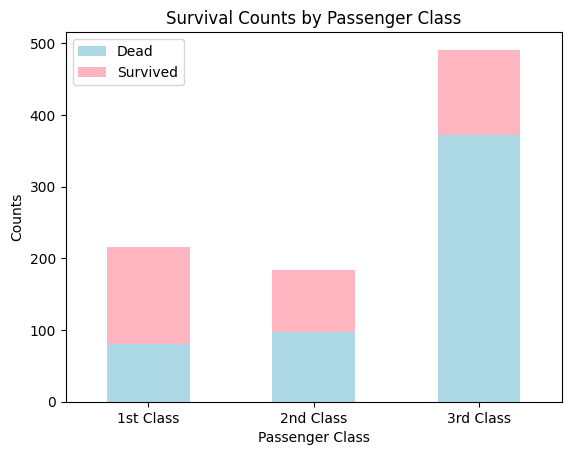

In [747]:
# Create a contingency table
contingency_titanic = df.groupby(['pclass', 'survived']).size().unstack()

# Rename the index to use "Survived" and "Dead"
contingency_titanic.index = ['1st Class', '2nd Class', '3rd Class']  # Rename classes
contingency_titanic.columns = ['Dead', 'Survived']  # Rename 0 and 1

# Create a stacked bar plot
titanic_barplot = contingency_titanic.plot.bar(stacked=True, 
                                               color=["lightblue", "lightpink"])

plt.ylabel("Counts")
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.title('Survival Counts by Passenger Class')
plt.show()

##### Observations
We can see that there were many more 3rd class passengers onboard as well as more 3rd class passengers who did not survive.

#### Correlation Heatmap with survival status

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


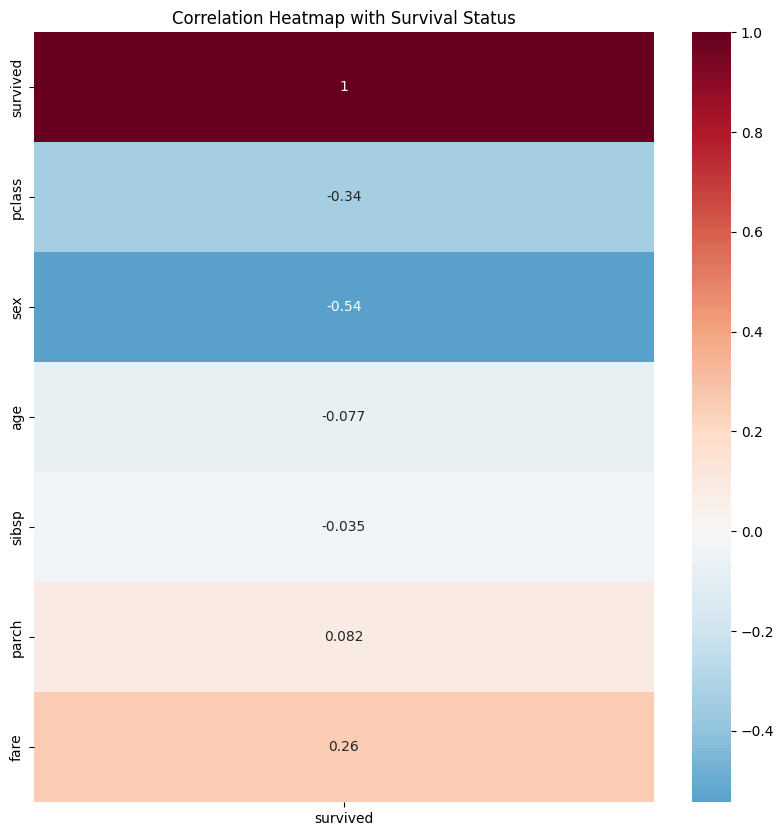

In [746]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Convert categorical variables to numeric
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Check the data types after conversion
print(df.dtypes)

# Drop any non-numeric columns before calculating the correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix using only numeric columns
correlation_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix[['survived']], cmap="RdBu_r", center=0.0, annot=True)
plt.title('Correlation Heatmap with Survival Status')
plt.show()

##### Observations  
We can easily see that both passenger class and sex are correlated with survival.

#### Question 3:  Did the sex of the passenger play a role in survival?

#### Barplot Male vs. Female Survivors

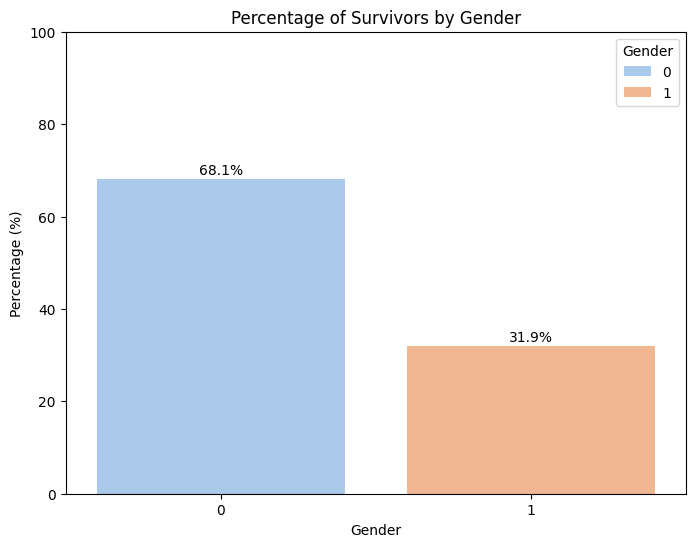

In [748]:
# Filter for survivors
survivors = df[df['survived'] == 1]

# Calculate the counts of males and females among survivors
gender_counts = survivors['sex'].value_counts()

# Convert the Series to a DataFrame for easier plotting
gender_percentages = (gender_counts / gender_counts.sum() * 100).reset_index()
gender_percentages.columns = ['Gender', 'Percentage']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', hue='Gender', y='Percentage', data=gender_percentages, palette='pastel')

# Customize the plot
plt.title('Percentage of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')

# Add percentage labels on top of the bars
for index, value in enumerate(gender_percentages['Percentage']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center')

plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

##### Observations
It is clear that a higher percentage of females survived than men.

#### Question 4:  Did age play a role in survival?

#### Scatter Plot of Age vs. Survival

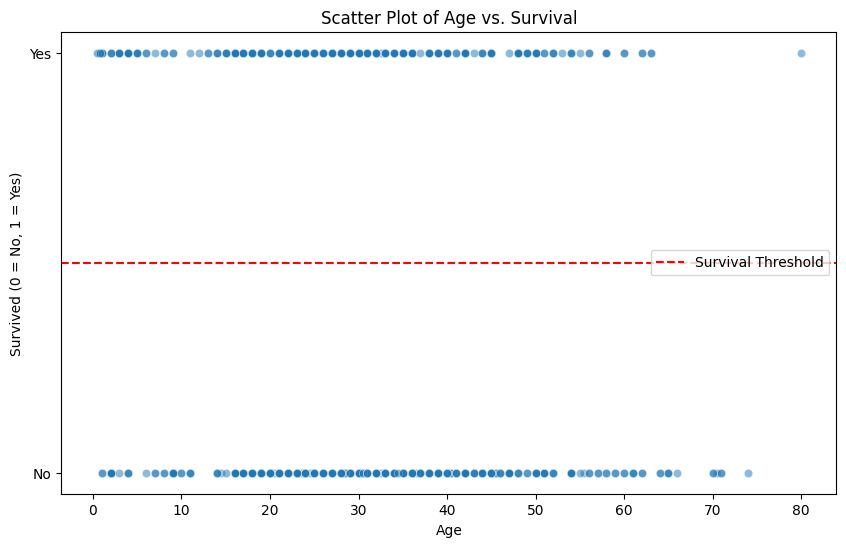

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='survived', data=titanic_data, alpha=0.5)
plt.title('Scatter Plot of Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Survived (0 = No, 1 = Yes)')
plt.yticks([0, 1], ['No', 'Yes'])
plt.axhline(0.5, color='red', linestyle='--', label='Survival Threshold')
plt.legend()
plt.show()

This scatter plot is indicating that not as many older passengers surived than died, and that very young passengers had a better chance of survival.

#### Box Plot of Age by Survival

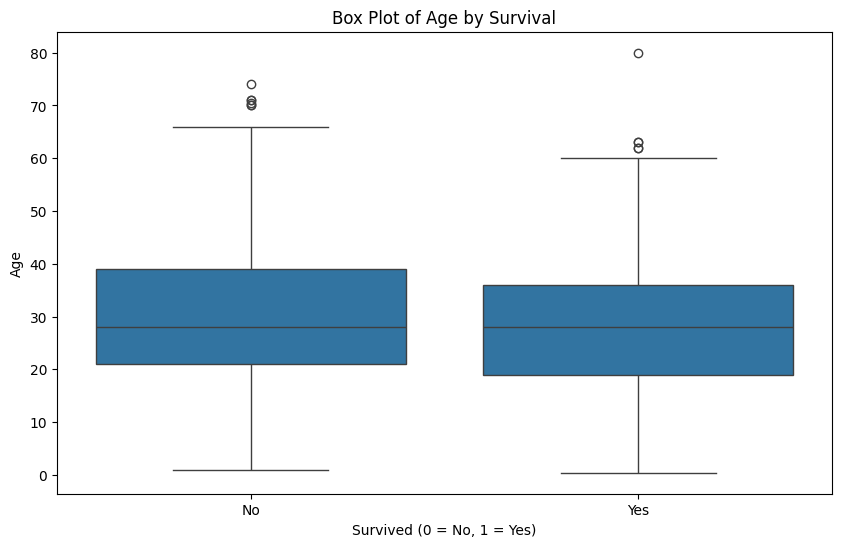

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=titanic_data)
plt.title('Box Plot of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

##### Observations  
This boxplot reveals a couple of things.  
1.  The median age of survivors is similar.
2.  The survived group had a narrower age range of survival than the not survived gorup indicated that the older passengers did not survive.

#### Question 5:  Overall, what is the order of the different groups and their survival if we look at class and sex?

#### Stacked Bar Plot

survived      0   1
pclass sex         
1      0      3  91
       1     77  45
2      0      6  70
       1     91  17
3      0     72  72
       1    300  47
survived           0         1
pclass sex                    
1      0    0.031915  0.968085
       1    0.631148  0.368852
2      0    0.078947  0.921053
       1    0.842593  0.157407
3      0    0.500000  0.500000
       1    0.864553  0.135447


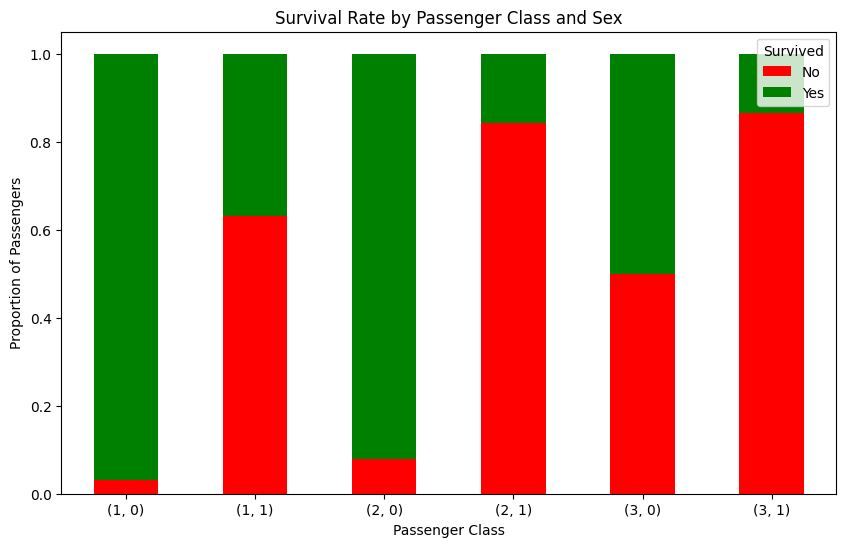

In [753]:
# Calculate survival rates by class and sex
survival_counts = df.groupby(['pclass', 'sex', 'survived']).size().unstack(fill_value=0)
print(survival_counts)

# Calculate the total count of passengers in each group
total_counts = survival_counts.sum(axis=1)

# Calculate survival proportions
survival_proportions = survival_counts.div(total_counts, axis=0)
print(survival_proportions)

# Create a stacked bar plot
ax = survival_proportions.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(10, 6))

# Customize the plot
plt.title('Survival Rate by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Proportion of Passengers')
plt.xticks(rotation=0)

# Set the legend with proper labels
plt.legend(title='Survived', labels=['No', 'Yes'], loc='upper right')

plt.show()

##### Observations  
The stacked bar plot is one of the best visulizations of survival vs. non-survival of the titanic datset.  We can tell several things from this bar plot.  If we were to rate the groups most likely to survive to those least likely to survive, this would be the order:  
1.  First class femaies - most likely to survive  
2.  Second class females   
3.  Third class females  
4.  First class men  
5.  Second class men  
6.  Third class men  

#### Initial Storytelling and Presentation
There are several things that are very clear after viewing the data from the Titanic dataset.  First, if you were a female, you were more likely to survive.  This is due to the "women and children first" mandate from the captain.  Next, if you were a wealthier individual, you were also more likely to survive which made the 1st class females the most likely to survive.  Third class passengers did not have even close to the survival proportion as first and second class passengers.  